# Bengaluru House Price Prediction - Data Cleaning and EDA

<h4> This notebook focuses on cleaning and performing exploratory data analysis (EDA) on the Bengaluru House Data dataset. The goal is to prepare the data for building a machine learning model to predict house prices in Bengaluru, India.

## Dataset Overview
The dataset contains various features related to house properties in Bengaluru. Below is a brief description of each column:

- **area_type**: Describes the type of area (e.g., Super built-up  Area, Plot  Area, Built-up  Area, Carpet  Area).
- **availability**: Indicates when the property will be available (e.g., Ready To Move, specific dates).
- **location**: The locality of the property.
- **size**: The number of bedrooms (e.g., 2 BHK, 3 BHK).
- **society**: Name of the housing society.
- **total_sqft**: Total square footage of the property. This column can contain ranges (e.g., '1000-1200').
- **bath**: Number of bathrooms.
- **balcony**: Number of balconies.
- **price**: Price of the property in Lakhs (Indian Rupees).

## Data Quality Issues and Cleaning

Before proceeding with further analysis, it's crucial to address data quality issues. Data can be broadly categorized into 'Dirty Data' and 'Messy Data'.

### 3.1 Dirty Data

Dirty data refers to inaccuracies or inconsistencies within the dataset. These issues can arise from various sources like data entry errors, measurement errors, or system glitches. In our Bengaluru House Data, we identified the following dirty data characteristics:

#### 3.1.1 Missing Values

As observed from the initial inspection, several columns have missing values:
- `society`: Has a significant number of missing values (41.3%). ... (dropped)
- `balcony` and `bath`: Few missing values → filled with mode/median
- `location` and `size`: Very few missing entries → dropped those rows

#### 3.1.2 Duplicated Data
Found **529 duplicate rows**, which we can remove.

#### 3.1.3 Inaccurate/Corrupted Data
- `total_sqft`: contained ranges/non-numeric → converted ranges to average, dropped invalid rows
- `size`: inconsistent text values ("2 BHK", "3 Bedroom") → extracted numerical BHK

### 3.2 Messy Data

Messy data refers to structural problems. Issues included:
- `total_sqft`: ranges → cleaned
- `availability`: mixed "Ready To Move" + dates → left for now
- `location`: too many categories → grouped less frequent ones into "Other"

The following sections detail the cleaning steps to address these issues.
"""


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Banglore House Prediction/Bengaluru_House_Data.csv'
df_raw = pd.read_csv(path)
df_raw.shape

(13320, 9)

In [ ]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


## Data Cleaning

In [ ]:
df = df_raw.copy()

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.isnull().mean()*100
# scoiety has 41.3% missing value (need to drop )

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


In [ ]:
# Drop the 'society' column due to high number of missing values
df2 = df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [ ]:
# Use the median to fill missing values
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].median())

In [ ]:
# Display the count of missing values to verify the change
print("Missing values after filling:")
print(df2.isnull().sum())

Missing values after filling:
area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64


In [ ]:
# drop na value  row from df2
# bcoz there  is very less % value missing
df2 = df2.dropna()
df2.shape

(13246, 8)

In [ ]:
df2.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
size_bhk = df2['size'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1851339150.py:1: SyntaxWarning: invalid escape sequence '\d'
  size_bhk = df2['size'].str.extract('(\d+)').astype(float)


In [ ]:
df2.insert(4,'size(bhk)',size_bhk)

In [ ]:
df2 = df2.drop('size', axis=1)

In [ ]:
df2

,area_type,availability,location,size(bhk),total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


In [ ]:
df2[df2['size(bhk)'].isnull()]

,area_type,availability,location,size(bhk),total_sqft,bath,balcony,price


In [ ]:
df2[df2['location'].isnull()]

,area_type,availability,location,size(bhk),total_sqft,bath,balcony,price


In [ ]:
df2.isnull().sum()

,0
area_type,0
availability,0
location,0
size(bhk),0
total_sqft,0
bath,0
balcony,0
price,0


In [ ]:
df2.duplicated().sum()

np.int64(569)

In [ ]:
df2.head()

,area_type,availability,location,size(bhk),total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


## size_bhk Column

In [ ]:
df2.rename(columns={'size(bhk)': 'size_bhk'}, inplace=True)

<Axes: xlabel='size_bhk', ylabel='Count'>

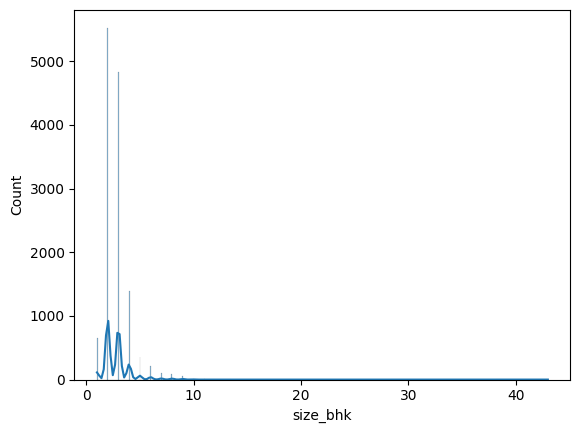

In [ ]:
sns.histplot(df2['size_bhk'], kde = True)

In [ ]:
df2['size_bhk'].skew()

np.float64(4.837637826696726)

<Axes: >

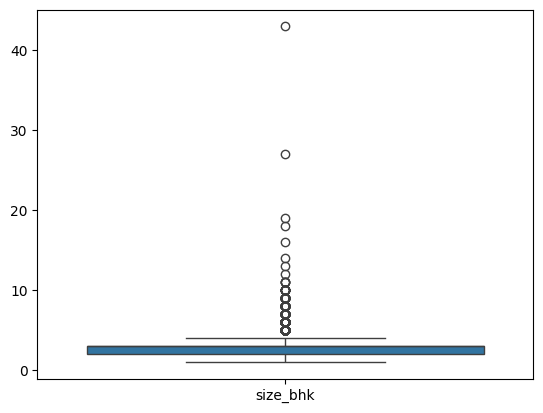

In [ ]:
sns.boxplot([df2['size_bhk']])

In [ ]:
df2['size_bhk'].describe()

,size_bhk
count,13246.000000
mean,2.801902
std,1.295758
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,43.000000


In [ ]:
initial_rows = df2.shape[0]
df2 = df2[df2['size_bhk'] <= 6]
removed_rows = initial_rows - df2.shape[0]

# Display the shape to show the number of rows removed.
print(f"Initial shape of the DataFrame: {initial_rows} rows")
print(f"Shape of the DataFrame after removing outliers: {df2.shape[0]} rows")
print(f"Number of rows removed: {removed_rows}")

# Display a sample of the cleaned DataFrame.
print("\nFirst 5 rows of the DataFrame after outlier removal:")
print(df2.head())

Initial shape of the DataFrame: 13246 rows
Shape of the DataFrame after removing outliers: 12977 rows
Number of rows removed: 269

First 5 rows of the DataFrame after outlier removal:
              area_type   availability                  location  size_bhk  \
0  Super built-up  Area         19-Dec  Electronic City Phase II       2.0   
1            Plot  Area  Ready To Move          Chikka Tirupathi       4.0   
2        Built-up  Area  Ready To Move               Uttarahalli       3.0   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli       3.0   
4  Super built-up  Area  Ready To Move                  Kothanur       2.0   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00  


In [ ]:
df2

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


## total_sqft column

In [ ]:
def convert_total_sqft(value):
    try:
        # If the value is a string and contains a hyphen, it's a range.
        if isinstance(value, str) and '-' in value:
            # Split the range, convert both parts to float, and return the average.
            start, end = map(float, value.split('-'))
            return (start + end) / 2
        # Otherwise, if it's a single number (or convertible to one), return it as a float.
        return float(value)
    except (ValueError, TypeError):
        # If conversion fails (e.g., due to non-numeric text), return NaN.
        return np.nan

In [ ]:
# Apply the robust function to the 'total_sqft' column.
df2['total_sqft'] = df2['total_sqft'].apply(convert_total_sqft)

/tmp/ipython-input-861897245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_total_sqft)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12977 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12977 non-null  object 
 1   availability  12977 non-null  object 
 2   location      12977 non-null  object 
 3   size_bhk      12977 non-null  float64
 4   total_sqft    12934 non-null  float64
 5   bath          12977 non-null  float64
 6   balcony       12977 non-null  float64
 7   price         12977 non-null  float64
dtypes: float64(5), object(3)
memory usage: 912.4+ KB


In [ ]:
df2 = df2[~(df2['total_sqft']/df2['size_bhk'] < 400)]

In [ ]:
df2

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


<Axes: xlabel='total_sqft', ylabel='Count'>

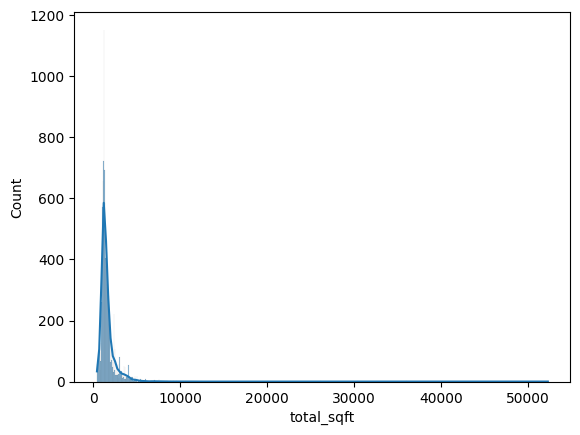

In [ ]:
sns.histplot(df2['total_sqft'], kde = True)

In [ ]:
df2['total_sqft'].skew()

np.float64(15.286471728615926)

<Axes: >

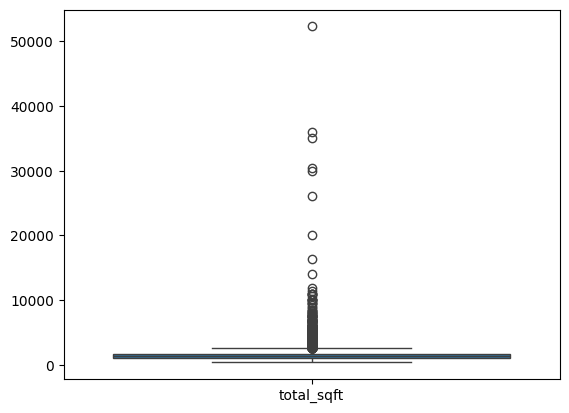

In [ ]:
sns.boxplot([df2['total_sqft']])

In [ ]:
df2['total_sqft'].describe()

,total_sqft
count,11648.000000
mean,1597.528481
std,1202.377438
min,400.000000
25%,1128.000000
50%,1314.500000
75%,1711.000000
max,52272.000000


In [ ]:
initial_rows = df2.shape[0]
df2 = df2[df2['total_sqft'] <= 10000]
removed_rows = initial_rows - df2.shape[0]

# Display the shape to show the number of rows removed.
print(f"Initial shape of the DataFrame: {initial_rows} rows")
print(f"Shape of the DataFrame after removing outliers: {df2.shape[0]} rows")
print(f"Number of rows removed: {removed_rows}")

# Display a sample of the cleaned DataFrame.
print("\nFirst 5 rows of the DataFrame after outlier removal:")
print(df2.head())

Initial shape of the DataFrame: 11691 rows
Shape of the DataFrame after removing outliers: 11630 rows
Number of rows removed: 61

First 5 rows of the DataFrame after outlier removal:
              area_type   availability                  location  size_bhk  \
0  Super built-up  Area         19-Dec  Electronic City Phase II       2.0   
1            Plot  Area  Ready To Move          Chikka Tirupathi       4.0   
2        Built-up  Area  Ready To Move               Uttarahalli       3.0   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli       3.0   
4  Super built-up  Area  Ready To Move                  Kothanur       2.0   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  
2      1440.0   2.0      3.0   62.00  
3      1521.0   3.0      1.0   95.00  
4      1200.0   2.0      1.0   51.00  


In [ ]:
df2

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


## bath columns

<Axes: xlabel='bath', ylabel='Count'>

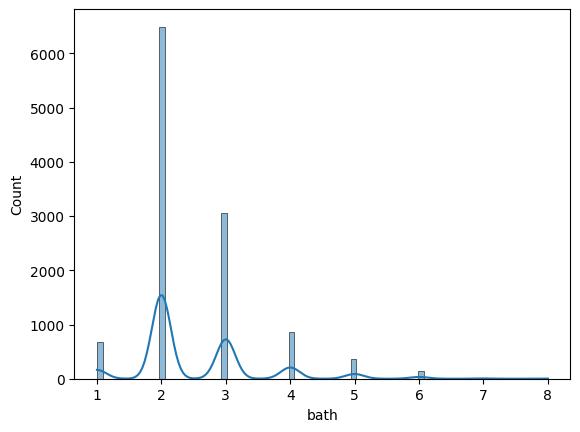

In [ ]:
sns.histplot(df2['bath'], kde = True)

In [ ]:
df2['bath'].skew()

np.float64(1.4919008317159688)

<Axes: >

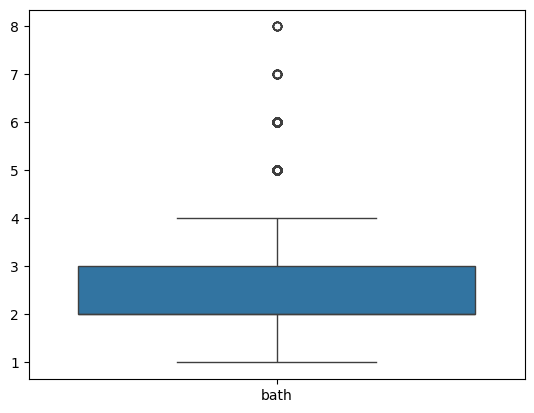

In [ ]:
sns.boxplot([df2['bath']])

## balcony columns

<Axes: xlabel='balcony', ylabel='Count'>

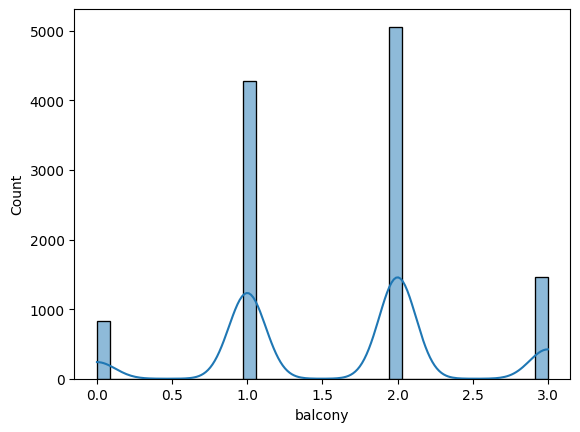

In [ ]:
sns.histplot(df2['balcony'], kde = True)

In [ ]:
df2['balcony'].skew()

np.float64(-0.05499543140894227)

<Axes: >

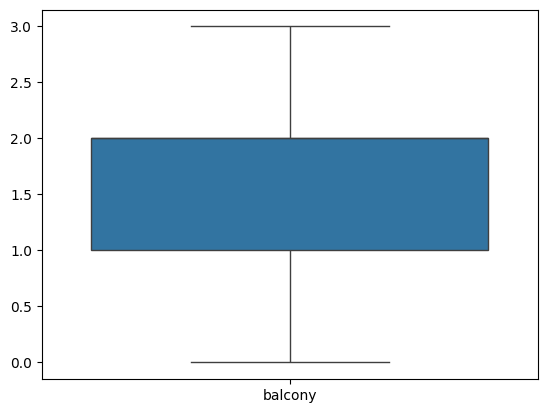

In [ ]:
sns.boxplot([df2['balcony']])

In [ ]:
balconys = df2[df2['balcony'] > 5]

print("Houses with more than 10 bedrooms:")
print(balconys)

Houses with more than 10 bedrooms:
Empty DataFrame
Columns: [area_type, availability, location, size_bhk, total_sqft, bath, balcony, price]
Index: []


## price columns

<Axes: xlabel='price', ylabel='Count'>

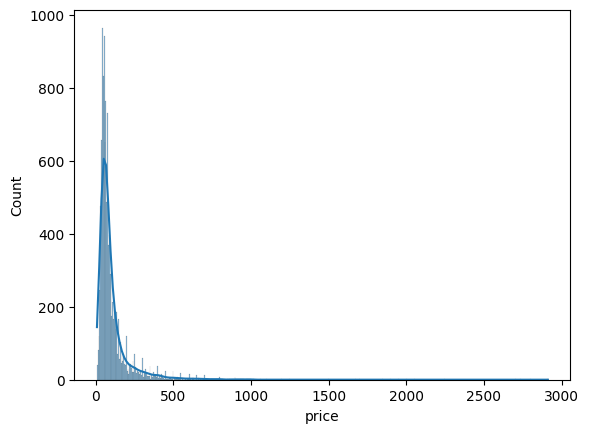

In [ ]:
sns.histplot(df2['price'], kde = True)

In [ ]:
df2['price'].skew()

np.float64(7.590292143355864)

<Axes: >

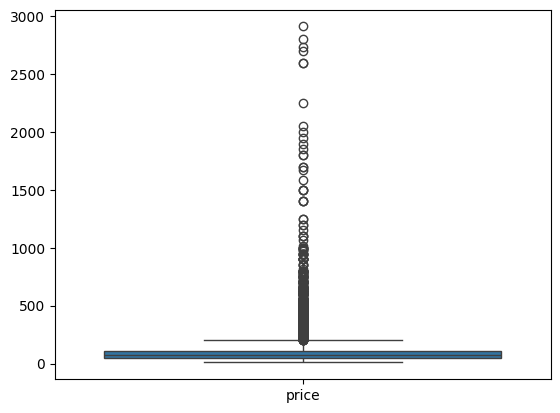

In [ ]:
sns.boxplot([df2['price']])

In [ ]:
df2.shape

(11630, 8)

In [ ]:
initial_rows = df2.shape[0]
df2 = df2[df2['price'] <= 500]
removed_rows = initial_rows - df2.shape[0]

# Display the shape to show the number of rows removed.
print(f"Initial shape of the DataFrame: {initial_rows} rows")
print(f"Shape of the DataFrame after removing outliers: {df2.shape[0]} rows")
print(f"Number of rows removed: {removed_rows}")

# Display a sample of the cleaned DataFrame.
print("\nFirst 5 rows of the DataFrame after outlier removal:")
print(df2.head())

Initial shape of the DataFrame: 11630 rows
Shape of the DataFrame after removing outliers: 11421 rows
Number of rows removed: 209

First 5 rows of the DataFrame after outlier removal:
              area_type   availability                  location  size_bhk  \
0  Super built-up  Area         19-Dec  Electronic City Phase II       2.0   
1            Plot  Area  Ready To Move          Chikka Tirupathi       4.0   
2        Built-up  Area  Ready To Move               Uttarahalli       3.0   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli       3.0   
4  Super built-up  Area  Ready To Move                  Kothanur       2.0   

   total_sqft  bath  balcony   price  
0      1056.0   2.0      1.0   39.07  
1      2600.0   5.0      3.0  120.00  
2      1440.0   2.0      3.0   62.00  
3      1521.0   3.0      1.0   95.00  
4      1200.0   2.0      1.0   51.00  


## price_per_sqft column

In [ ]:
# Calculate 'price_per_sqft'. Since the 'price' is in lakhs, we multiply by 100000 for a per-rupee value.
df2['price_per_sqft'] = (df2['price'] * 100000) / df2['total_sqft']

/tmp/ipython-input-3841833648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft'] = (df2['price'] * 100000) / df2['total_sqft']


<Axes: >

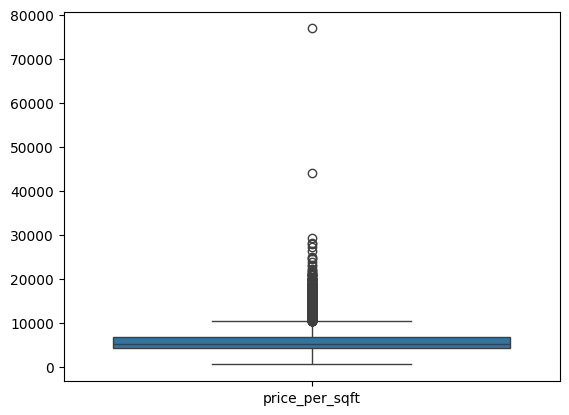

In [ ]:
sns.boxplot([df2['price_per_sqft']])

In [ ]:
df2['price_per_sqft'].describe()

,price_per_sqft
count,11421.000000
mean,5894.668029
std,2803.300518
min,500.000000
25%,4200.000000
50%,5238.319962
75%,6682.436428
max,76923.076923


In [ ]:
df2

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00,6689.834926
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600.0,5.0,2.0,400.00,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,10407.336319


In [ ]:
# Calculate the 99th percentile of 'price_per_sqft'
percentile_99 = df2['price_per_sqft'].quantile(0.99)
print(f"99th percentile of price_per_sqft: {percentile_99}")

initial_rows = df2.shape[0]
df2 = df2[df2['price_per_sqft'] < percentile_99]

99th percentile of price_per_sqft: 16666.666666666668


In [ ]:
df2

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00,6689.834926
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600.0,5.0,2.0,400.00,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,10407.336319


## Categorical variable Encoding

In [ ]:
df2.head()

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


In [ ]:
df2['area_type'].value_counts()

,count
area_type,
Super built-up Area,8266
Built-up Area,2114
Plot Area,856
Carpet Area,64


In [ ]:
# Get the count of properties for each location.
location_counts = df2['location'].value_counts()

# Print the initial number of unique locations.
print("Initial number of unique locations:", len(location_counts))

# Define the threshold for what constitutes a "minor" location.
threshold = 15

# Identify locations that appear less than the threshold.
locations_to_replace = location_counts[location_counts < threshold].index

# Replace all minor locations with the string 'other' directly in the 'location' column of df2.
df2['location'] = df2['location'].apply(lambda x: 'other' if x in locations_to_replace else x)

Initial number of unique locations: 1104


/tmp/ipython-input-321416529.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].apply(lambda x: 'other' if x in locations_to_replace else x)


In [ ]:
df2['location'].value_counts()

,count
location,
other,2907
Whitefield,498
Sarjapur Road,363
Electronic City,266
Thanisandra,230
...,...
Bannerghatta,15
Nagavarapalya,15
BTM Layout,15


In [ ]:
df2

,area_type,availability,location,size_bhk,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00,6689.834926
13316,Super built-up Area,Ready To Move,other,4.0,3600.0,5.0,2.0,400.00,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,10407.336319


In [ ]:
# Convert 'availability' to a binary feature using np.where
df2['availability'] = np.where(df2['availability'] == 'Ready To Move', 1, 0)

# Get the list of columns
cols = df2.columns.tolist()

# Move 'availability' column to be after 'price_per_sqft'
# Find the index of 'availability' and 'price_per_sqft'
availability_index = cols.index('availability')
price_per_sqft_index = cols.index('price_per_sqft')

# Remove 'availability' from its current position
cols.pop(availability_index)

# Insert 'availability' after 'price_per_sqft'
cols.insert(price_per_sqft_index + 1, 'availability')

# Reindex the DataFrame with the new column order
df2 = df2[cols]

# Display the first few rows to show the change
display(df2.head())

/tmp/ipython-input-3975777878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['availability'] = np.where(df2['availability'] == 'Ready To Move', 1, 0)


,area_type,location,size_bhk,total_sqft,bath,balcony,price,price_per_sqft,availability
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,0
1,Plot Area,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,1
2,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,1
3,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,1
4,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,1


In [ ]:
# Perform one-hot encoding on the 'area_type' column, keeping all categories
df_encoded_area_type = pd.get_dummies(df2['area_type'], prefix='area_type')

# Convert the newly created boolean dummy columns to integers (0s and 1s)
bool_cols = df_encoded_area_type.select_dtypes(include='bool').columns
df_encoded_area_type[bool_cols] = df_encoded_area_type[bool_cols].astype(int)

# Concatenate the new one-hot encoded columns with the original DataFrame (excluding the original 'area_type' column)
df2 = pd.concat([df2.drop('area_type', axis=1), df_encoded_area_type], axis=1)

# Display the first few rows to show the new columns
display(df2.head())

,location,size_bhk,total_sqft,bath,balcony,price,price_per_sqft,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606,0,0,0,0,1
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615,1,0,0,1,0
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556,1,1,0,0,0
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861,1,0,0,0,1
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000,1,0,0,0,1


In [ ]:
# Perform one-hot encoding on the 'location' column
df2 = pd.get_dummies(df2, columns=['location'], prefix='location')

# Convert the newly created boolean dummy columns to integers (0s and 1s)
bool_cols = df2.select_dtypes(include='bool').columns
df2[bool_cols] = df2[bool_cols].astype(int)

# Display the first few rows to show the new location columns
display(df2.head())

,size_bhk,total_sqft,bath,balcony,price,price_per_sqft,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,2.0,1056.0,2.0,1.0,39.07,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,5.0,3.0,120.00,4615.384615,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,62.00,4305.555556,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,6245.890861,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,51.00,4250.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2

,size_bhk,total_sqft,bath,balcony,price,price_per_sqft,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,location_Varthur,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yeshwanthpur,location_other
0,2.0,1056.0,2.0,1.0,39.07,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,5.0,3.0,120.00,4615.384615,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,62.00,4305.555556,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,6245.890861,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,51.00,4250.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,5.0,3453.0,4.0,0.0,231.00,6689.834926,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,4.0,3600.0,5.0,2.0,400.00,11111.111111,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,2.0,1141.0,2.0,1.0,60.00,5258.545136,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,4689.0,4.0,1.0,488.00,10407.336319,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exporting the Dataset

In [ ]:
df2.to_csv('BHP_Cleaned_Data.csv',index=False)